In [26]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import boxcox 

data, meta = arff.loadarff('MagicTelescope.arff')

df = pd.DataFrame(data)
df['fSize:'], _ = boxcox(df['fSize:'])

In [27]:
df.head()

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,1.0,28.7967,16.0021,0.585326,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,b'g'
1,2.0,31.6036,11.7235,0.568872,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,b'g'
2,3.0,162.0520,136.0310,0.695890,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,b'g'
3,4.0,23.8172,9.5728,0.542123,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,b'g'
4,5.0,75.1362,30.9205,0.637975,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,b'g'


In [6]:
df.shape

(19020, 12)

In [7]:
df.describe()

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,9510.500000,53.250154,22.180966,0.597551,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,5490.745396,42.364855,18.346056,0.048359,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,1.000000,4.283500,0.000000,0.464003,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,4755.750000,24.336000,11.863800,0.563090,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,9510.500000,37.147700,17.139900,0.596587,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,14265.250000,70.122175,24.739475,0.632864,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,19020.000000,334.177000,256.382000,0.742265,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         19020 non-null  float64
 1   fLength:   19020 non-null  float64
 2   fWidth:    19020 non-null  float64
 3   fSize:     19020 non-null  float64
 4   fConc:     19020 non-null  float64
 5   fConc1:    19020 non-null  float64
 6   fAsym:     19020 non-null  float64
 7   fM3Long:   19020 non-null  float64
 8   fM3Trans:  19020 non-null  float64
 9   fAlpha:    19020 non-null  float64
 10  fDist:     19020 non-null  float64
 11  class:     19020 non-null  object 
dtypes: float64(11), object(1)
memory usage: 1.7+ MB


In [9]:
df.nunique()

ID           19020
fLength:     18643
fWidth:      18200
fSize:        7228
fConc:        6410
fConc1:       4421
fAsym:       18704
fM3Long:     18693
fM3Trans:    18390
fAlpha:      17981
fDist:       18437
class:           2
dtype: int64

In [10]:
print(df.duplicated().sum())

0


In [11]:
print(df.isna().sum())

ID           0
fLength:     0
fWidth:      0
fSize:       0
fConc:       0
fConc1:      0
fAsym:       0
fM3Long:     0
fM3Trans:    0
fAlpha:      0
fDist:       0
class:       0
dtype: int64


In [12]:
numeric_df = df.select_dtypes(include=[np.number])
cols = numeric_df.columns

correlations = []

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        col1, col2 = cols[i], cols[j]
        corr_value = np.corrcoef(df[col1], df[col2])[0, 1]
        correlations.append((col1, col2, corr_value))

corr_df = pd.DataFrame(correlations, columns=["Feature 1", "Feature 2", "Correlation"])

corr_df = corr_df.sort_values(by="Correlation", ascending=False)

print("Top 20 najsilnejších korelácií:")
print(corr_df.head(10))
print(corr_df.tail(10))

Top 20 najsilnejších korelácií:
   Feature 1 Feature 2  Correlation
34    fConc:   fConc1:     0.976412
10  fLength:   fWidth:     0.770512
11  fLength:    fSize:     0.681549
19   fWidth:    fSize:     0.664222
33    fSize:    fDist:     0.426912
18  fLength:    fDist:     0.418466
8         ID   fAlpha:     0.385102
26   fWidth:    fDist:     0.336816
45    fAsym:  fM3Long:     0.274045
0         ID  fLength:     0.257243
   Feature 1 Feature 2  Correlation
22   fWidth:    fAsym:    -0.266961
44   fConc1:    fDist:    -0.304625
39    fConc:    fDist:    -0.328332
14  fLength:    fAsym:    -0.368556
21   fWidth:   fConc1:    -0.581141
13  fLength:   fConc1:    -0.598145
20   fWidth:    fConc:    -0.609779
12  fLength:    fConc:    -0.630999
28    fSize:   fConc1:    -0.846108
27    fSize:    fConc:    -0.892051


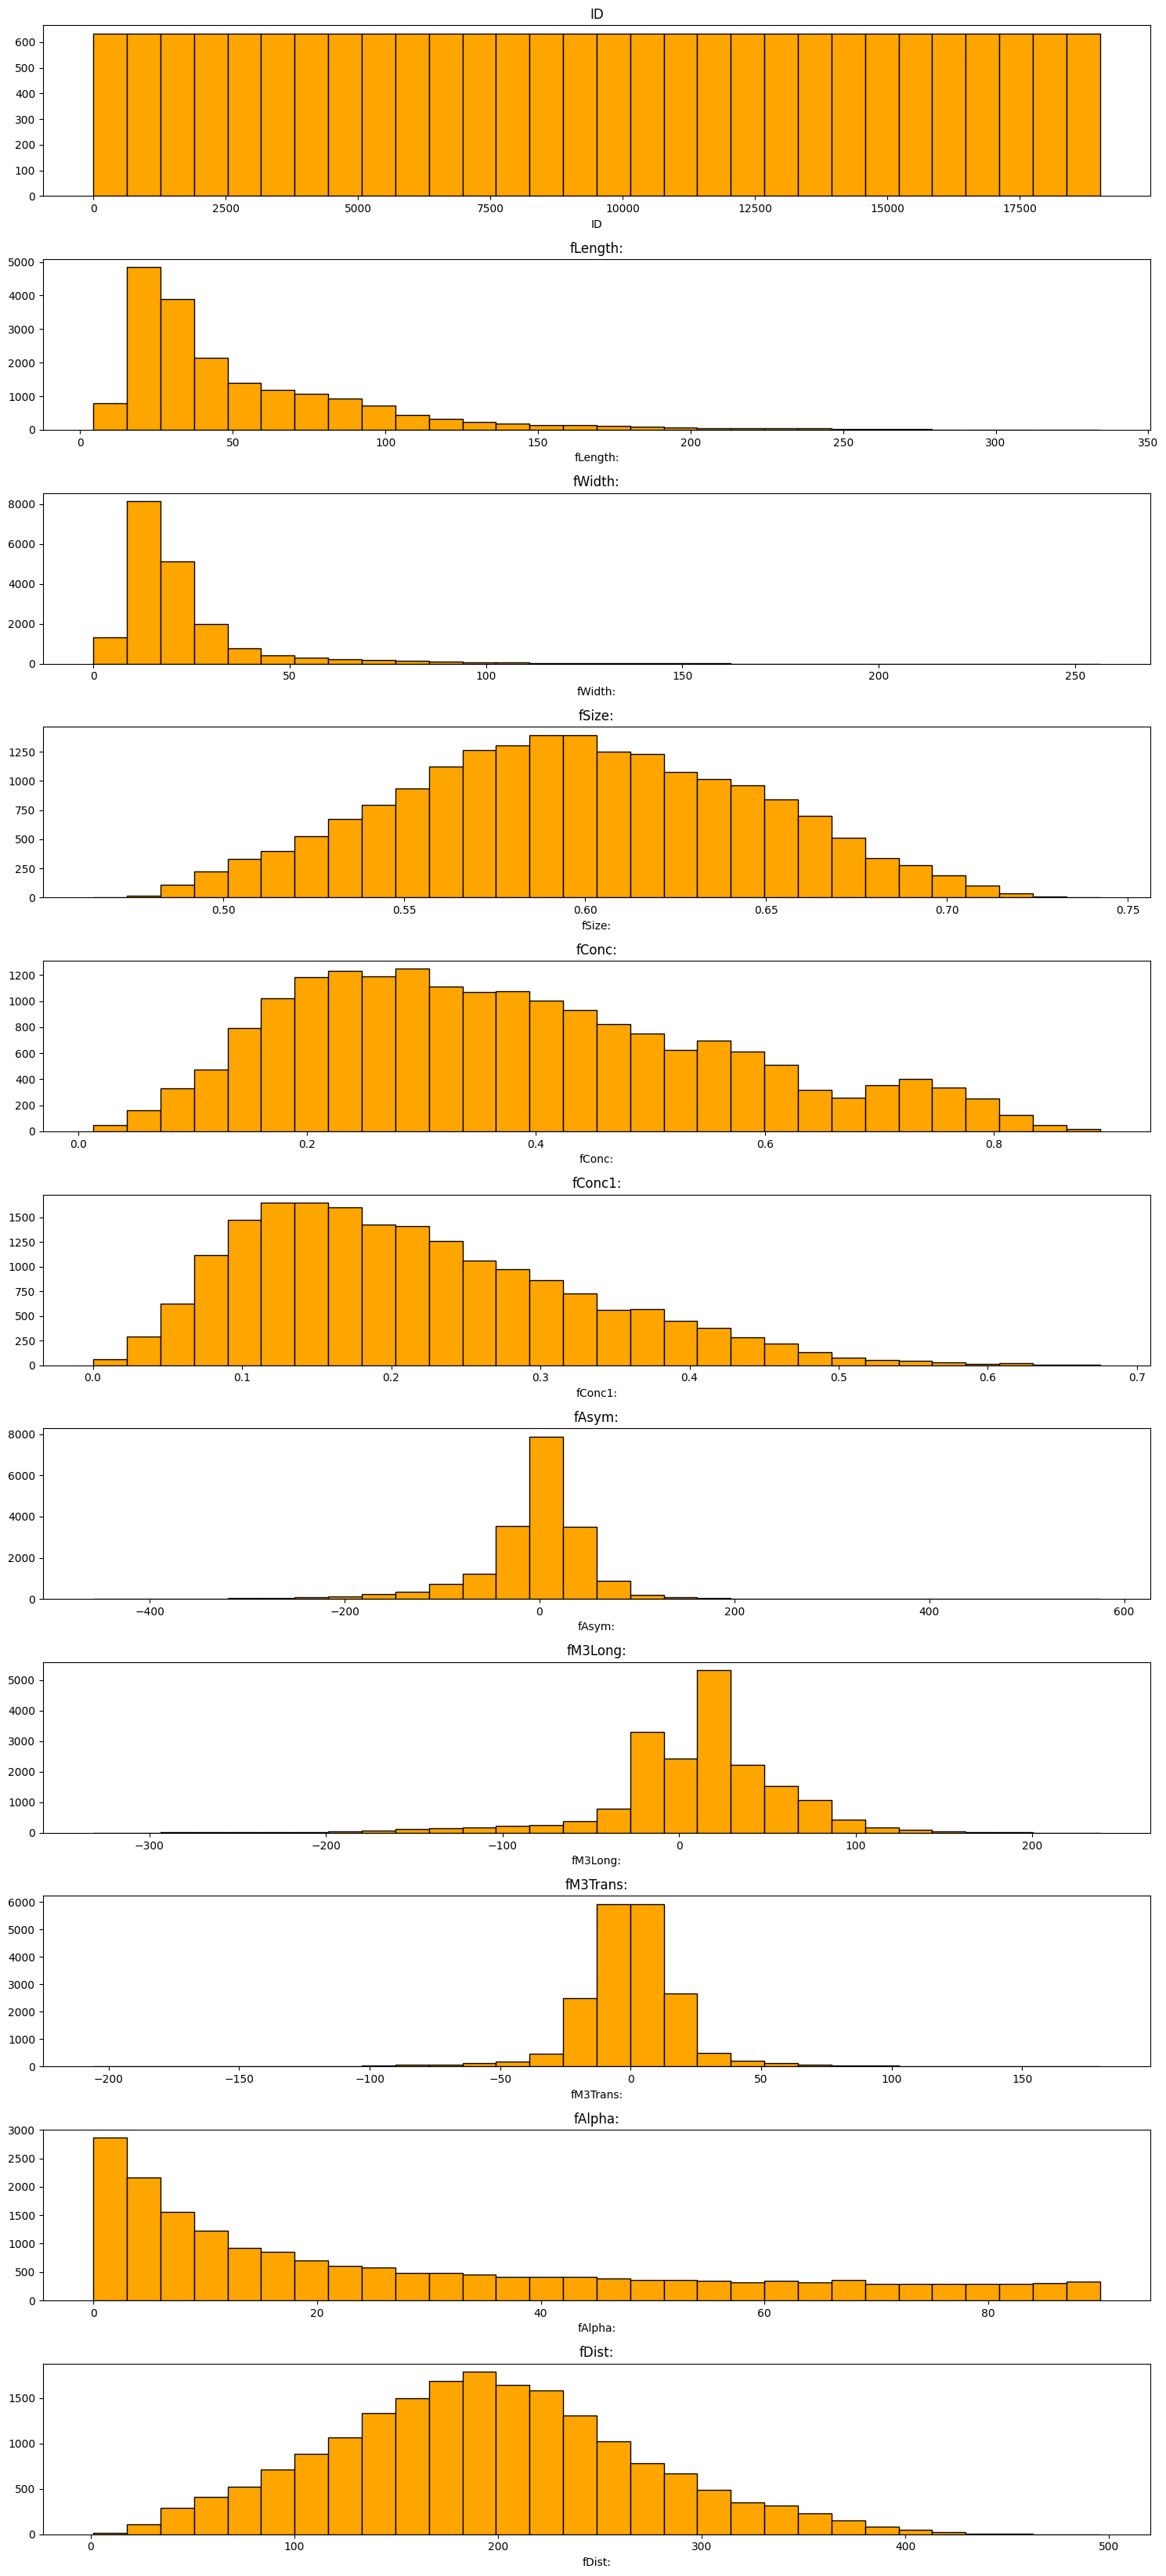

In [13]:
plt.figure(figsize=(15, len(cols) * 3))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    plt.hist(df[col].dropna(), bins=30, color = "orange", edgecolor='black')
    plt.title(col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

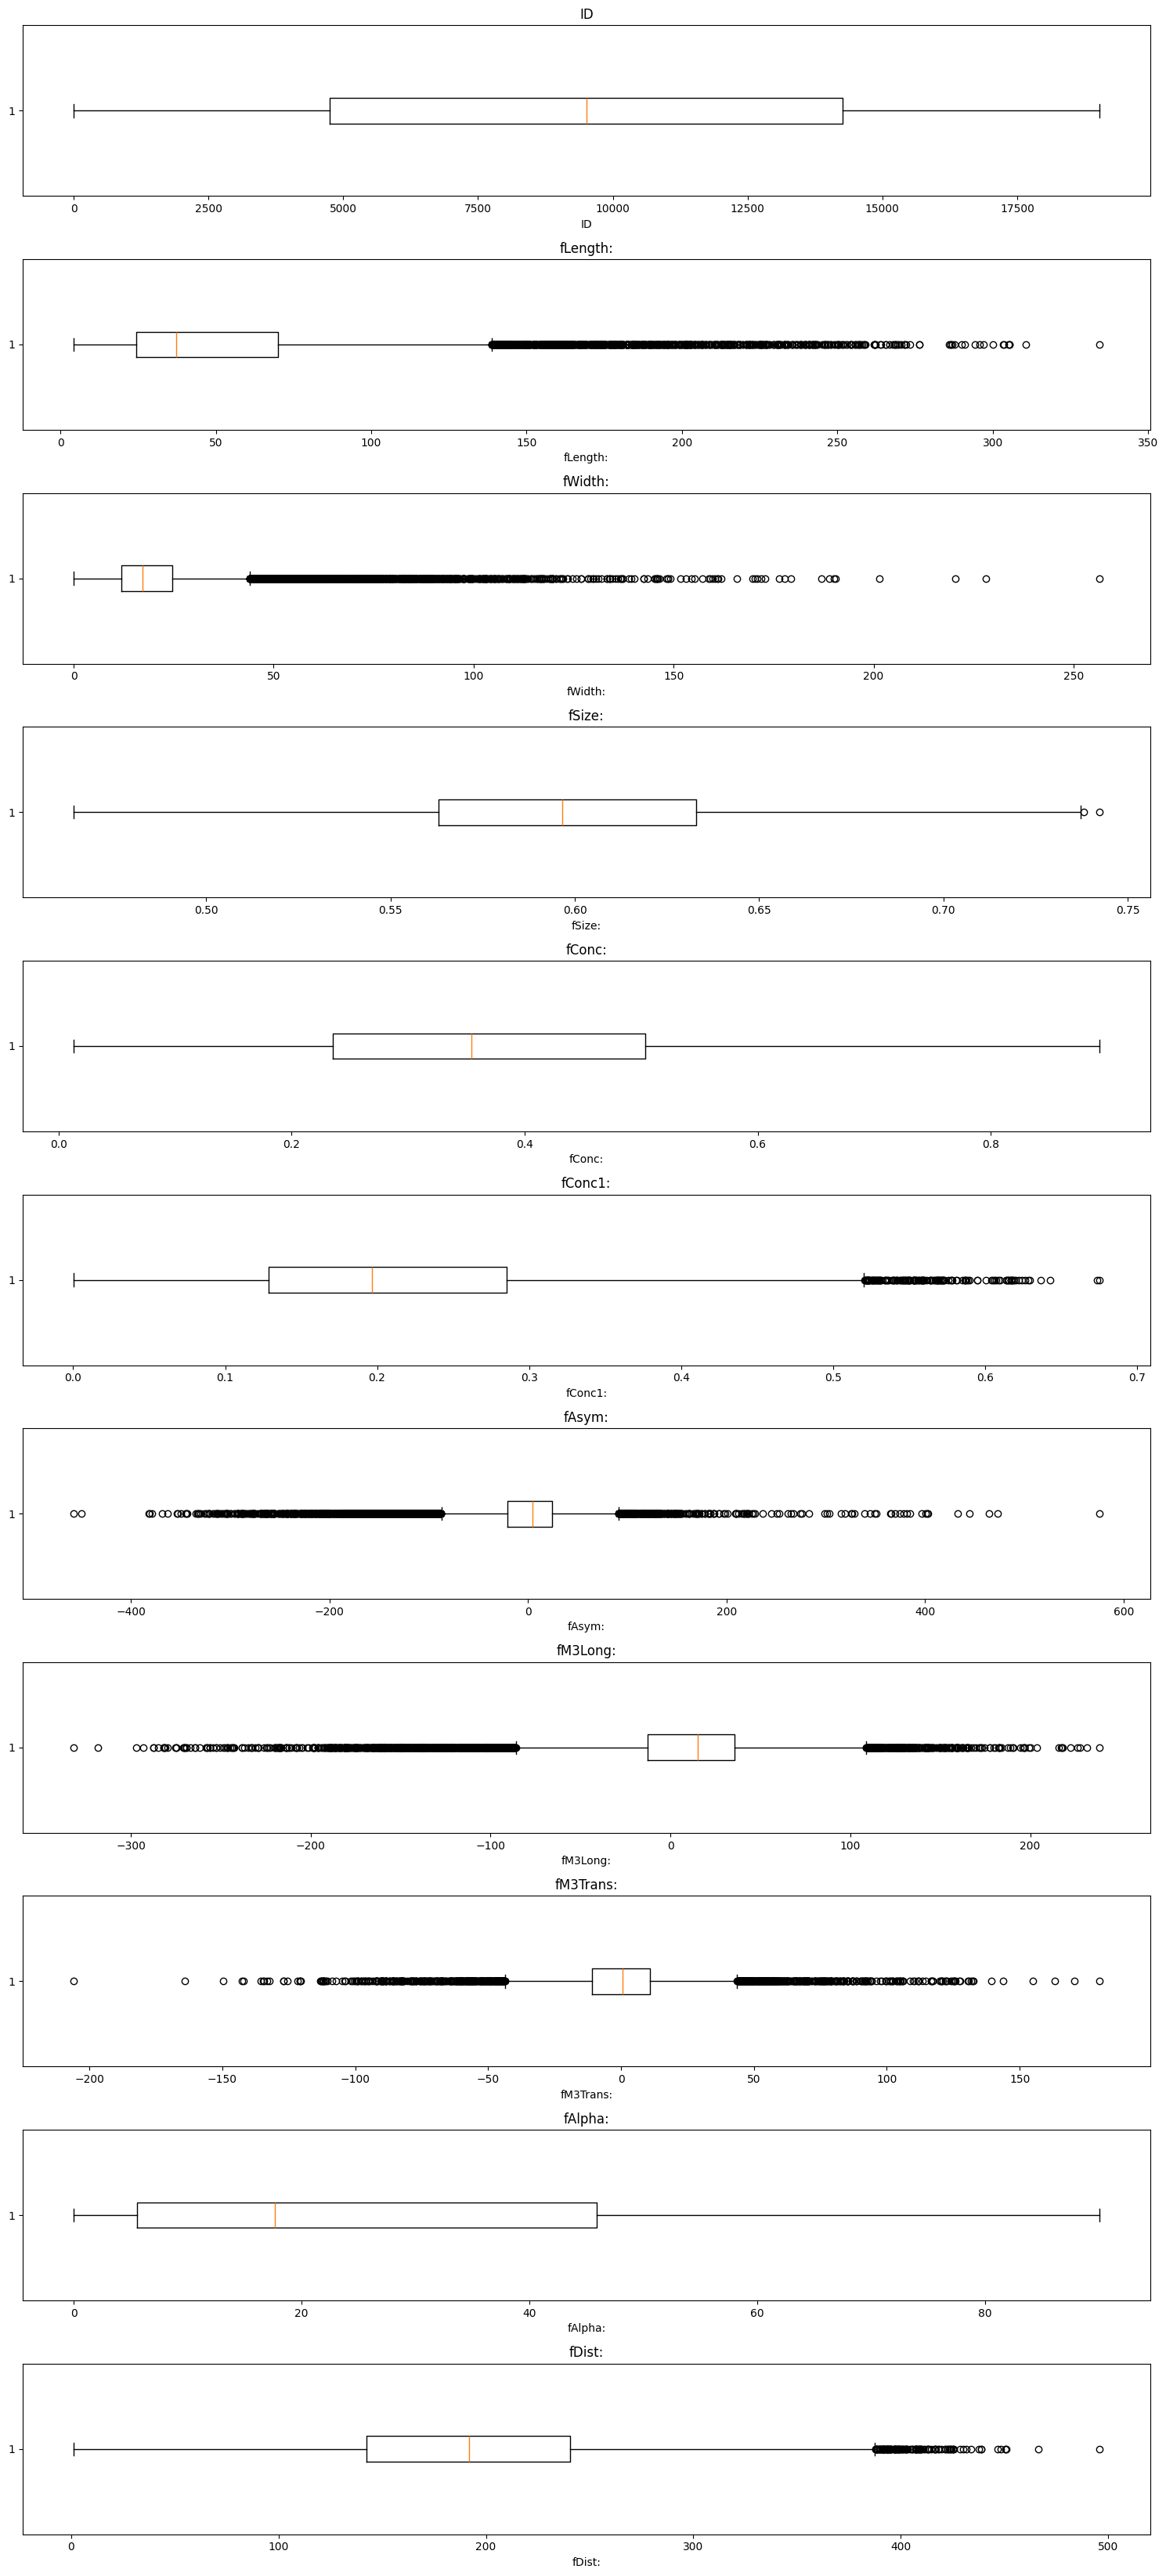

In [14]:
plt.figure(figsize=(15, len(cols) * 3))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [17]:
numeric_df = df.select_dtypes(include=[np.number])

for col in numeric_df.columns:
    stat, p = shapiro(df[col])
    print(p)

2.268443853164685e-59
8.133404060550683e-93
1.5423236511023563e-103
3.556478336730502e-25
1.0260738464095494e-52
3.0703986576980104e-56
4.133179728229826e-84
1.4561558074025387e-72
1.0034033956235664e-78
6.257989223858619e-82
3.562749318318082e-25


C:\Users\nikio\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19020.
  res = hypotest_fun_out(*samples, **kwds)


In [16]:
outliers_count = {}

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    count = numeric_df[(numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)][col].count()
    outliers_count[col] = count

outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Column', 'Outliers_Count'])
outliers_df = outliers_df.sort_values(by='Outliers_Count', ascending=False)

print(outliers_df)

       Column  Outliers_Count
6      fAsym:            1781
2     fWidth:            1546
7    fM3Long:            1218
1    fLength:             971
8   fM3Trans:             850
5     fConc1:             150
10     fDist:             128
3      fSize:               2
0          ID               0
4      fConc:               0
9     fAlpha:               0


For me it's a big problem to figure out what to do with outlires because it's our data and we can't just throw it away if we aren't sure that it has som problems. I have used boxcox to minimize influence and reduce amount of oulires in fSz.

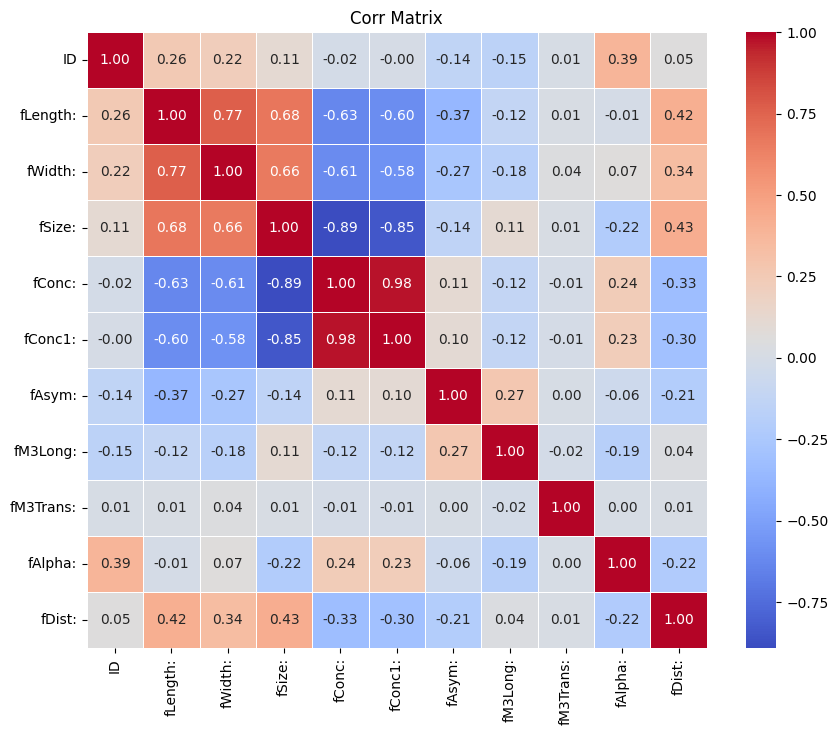

In [28]:
relationships_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(relationships_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Corr Matrix')
plt.show()